## Pandas adavanced functionalities

In [2]:
def my_func(v, w):
    return v + w
    
list(map(my_func, [0, 1, 2], (3, 23, 43)))

[3, 24, 45]

In [1]:
import numpy as np
import pandas as pd

Let's import the movies database again

In [2]:
imdb_movies = pd.read_csv("../datasets/imdb-movies.csv")
imdb_movies.set_index('Rank', inplace=True)
imdb_movies.shape

(1000, 10)

In [5]:
imdb_movies.head()

,Title,Genre,Director,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,Actors
Rank,,,,,,,,,,
1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",James Gunn,2014,121,8.1,757074,333.13,76.0,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S..."
2,Prometheus,"Adventure,Mystery,Sci-Fi",Ridley Scott,2012,124,7.0,485820,126.46,65.0,"Noomi Rapace, Logan Marshall-Green, Michael Fa..."
3,Split,"Horror,Thriller",M. Night Shyamalan,2016,117,7.3,157606,138.12,62.0,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar..."
4,Sing,"Animation,Comedy,Family",Christophe Lourdelet,2016,108,7.2,60545,270.32,59.0,"Matthew McConaughey,Reese Witherspoon, Seth Ma..."
5,Suicide Squad,"Action,Adventure,Fantasy",David Ayer,2016,123,6.2,393727,325.02,40.0,"Will Smith, Jared Leto, Margot Robbie, Viola D..."


In [24]:
genre = imdb_movies.iloc[0]['Genre']

In [25]:
genre

'Action,Adventure,Sci-Fi'

In [26]:
genres = genre.split(',')
genres

['Action', 'Adventure', 'Sci-Fi']

In [27]:
def split_by_comma(input_string):
    return input_string.split(',')

imdb_movies['Genres'] = imdb_movies['Genre'].apply(
    lambda s: s.split(',') 
)

In [28]:
imdb_movies.head()

,Title,Genre,Director,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,Actors,Genres
Rank,,,,,,,,,,,
1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",James Gunn,2014,121,8.1,757074,333.13,76.0,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...","[Action, Adventure, Sci-Fi]"
2,Prometheus,"Adventure,Mystery,Sci-Fi",Ridley Scott,2012,124,7.0,485820,126.46,65.0,"Noomi Rapace, Logan Marshall-Green, Michael Fa...","[Adventure, Mystery, Sci-Fi]"
3,Split,"Horror,Thriller",M. Night Shyamalan,2016,117,7.3,157606,138.12,62.0,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...","[Horror, Thriller]"
4,Sing,"Animation,Comedy,Family",Christophe Lourdelet,2016,108,7.2,60545,270.32,59.0,"Matthew McConaughey,Reese Witherspoon, Seth Ma...","[Animation, Comedy, Family]"
5,Suicide Squad,"Action,Adventure,Fantasy",David Ayer,2016,123,6.2,393727,325.02,40.0,"Will Smith, Jared Leto, Margot Robbie, Viola D...","[Action, Adventure, Fantasy]"


In [29]:
imdb_movies['Actors'] = imdb_movies['Actors'].apply(split_by_comma)

In [30]:
del imdb_movies['Genre']

In [31]:

imdb_movies.head()

,Title,Director,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,Actors,Genres
Rank,,,,,,,,,,
1,Guardians of the Galaxy,James Gunn,2014,121,8.1,757074,333.13,76.0,"[Chris Pratt, Vin Diesel, Bradley Cooper, Z...","[Action, Adventure, Sci-Fi]"
2,Prometheus,Ridley Scott,2012,124,7.0,485820,126.46,65.0,"[Noomi Rapace, Logan Marshall-Green, Michael...","[Adventure, Mystery, Sci-Fi]"
3,Split,M. Night Shyamalan,2016,117,7.3,157606,138.12,62.0,"[James McAvoy, Anya Taylor-Joy, Haley Lu Ric...","[Horror, Thriller]"
4,Sing,Christophe Lourdelet,2016,108,7.2,60545,270.32,59.0,"[Matthew McConaughey, Reese Witherspoon, Seth...","[Animation, Comedy, Family]"
5,Suicide Squad,David Ayer,2016,123,6.2,393727,325.02,40.0,"[Will Smith, Jared Leto, Margot Robbie, Vio...","[Action, Adventure, Fantasy]"


In [32]:
# Find the highest Revenue / Metascore ratio

revenue_to_metascore_ratio = imdb_movies.apply(
    lambda row: row['Revenue (Millions)'] / row['Metascore'], 
    axis=1
)
revenue_to_metascore_ratio

Rank
1       4.383289
2       1.945538
3       2.227742
4       4.581695
5       8.125500
6       1.074524
7       1.624301
8            NaN
9       0.102692
10      2.439268
11      3.545758
12      2.287432
13      8.187231
14      3.070988
15      0.041000
16      6.037869
17      0.945352
18      2.795862
19      0.749130
20      1.240741
21      0.147347
22      0.496875
23           NaN
24      2.744464
25      3.223125
26           NaN
27           NaN
28           NaN
29      1.884667
30      1.518056
          ...   
971     0.553710
972          NaN
973     0.819362
974     0.734231
975     0.120685
976     1.610000
977          NaN
978          NaN
979          NaN
980     0.045571
981     1.402045
982     2.603333
983     0.434643
984     2.746333
985     0.907447
986     0.695484
987     0.851600
988     0.779667
989          NaN
990          NaN
991     1.040909
992     0.028571
993          NaN
994     1.625135
995     1.140000
996          NaN
997     0.381304
998     1

In [33]:
imdb_movies_sorted_by_ratio = imdb_movies.loc[:, ['Title', 'Director', 'Rating', 'Revenue (Millions)']]

In [34]:
imdb_movies_sorted_by_ratio['Revenue/Metascore Ratio'] = revenue_to_metascore_ratio
imdb_movies_sorted_by_ratio.sort_values(by='Revenue/Metascore Ratio', inplace=True, ascending=False)
imdb_movies_sorted_by_ratio.head()

,Title,Director,Rating,Revenue (Millions),Revenue/Metascore Ratio
Rank,,,,,
51,Star Wars: Episode VII - The Force Awakens,J.J. Abrams,8.1,936.63,11.563333
711,Transformers: Revenge of the Fallen,Michael Bay,6.0,402.08,11.488000
86,Jurassic World,Colin Trevorrow,7.0,652.18,11.053898
88,Avatar,James Cameron,7.8,760.51,9.162771
77,The Avengers,Joss Whedon,8.1,623.28,9.033043


In [36]:
rows = []
_ = imdb_movies.apply(lambda row: [rows.append([row.Title, row.Director, actor]) 
                         for actor in row.Actors], axis=1)
imdb_movies_unwinded = pd.DataFrame(rows, columns=['Title', 'Director', 'Actor'])
imdb_movies_unwinded

,Title,Director,Actor
0,Guardians of the Galaxy,James Gunn,Chris Pratt
1,Guardians of the Galaxy,James Gunn,Vin Diesel
2,Guardians of the Galaxy,James Gunn,Bradley Cooper
3,Guardians of the Galaxy,James Gunn,Zoe Saldana
4,Prometheus,Ridley Scott,Noomi Rapace
5,Prometheus,Ridley Scott,Logan Marshall-Green
6,Prometheus,Ridley Scott,Michael Fassbender
7,Prometheus,Ridley Scott,Charlize Theron
8,Split,M. Night Shyamalan,James McAvoy
9,Split,M. Night Shyamalan,Anya Taylor-Joy


## Split, Apply, Combine

The goal of our analysis will be to find which director generated on average more income.
We will have to:
1) split the dataframe according to directors
2) compute the average income per director
3) combine the results

In [41]:
# Split
grouped_by_director = imdb_movies[
    ['Director', 'Revenue (Millions)']
].groupby('Director')
type(grouped_by_director)

pandas.core.groupby.generic.DataFrameGroupBy

In [42]:
grouped_by_director.describe()

Revenue (Millions)                          \
                                         count        mean         std   
Director                                                                 
Aamir Khan                                 1.0    1.200000         NaN   
Abdellatif Kechiche                        1.0    2.200000         NaN   
Adam Leon                                  0.0         NaN         NaN   
Adam McKay                                 4.0  109.535000   32.740526   
Adam Shankman                              2.0   78.665000   56.787746   
Adam Wingard                               2.0   10.535000   14.446192   
Afonso Poyart                              0.0         NaN         NaN   
Aisling Walsh                              0.0         NaN         NaN   
Akan Satayev                               0.0         NaN         NaN   
Akiva Schaffer                             1.0    9.390000         NaN   
Alan Taylor                                2.0  148.045000   82.469864   
Albert Hughes                              1.0   94.820000         NaN   
Alejandro Amenábar                         1.0    0.050000         NaN   
Alejandro González Iñárritu                3.0   86.760000   83.996793   
Alessandro Carloni                         1.0  143.520000         NaN   
Alex Garland                               1.0   25.440000         NaN   
Alex Proyas                                1.0   31.140000         NaN   
Alex Ranarivelo                            0.0         NaN         NaN   
Alexander Payne                            1.0   82.620000         NaN   
Alexandre Aja                              3.0   22.313333   20.939669   
Alexandros Avranas                         0.0         NaN         NaN   
Alexi Pappas                               0.0         NaN         NaN   
Alfonso Cuarón                             2.0  154.685000  168.850028   
Alfonso Gomez-Rejon                        1.0    6.740000         NaN   
Allen Coulter                              1.0   19.060000         NaN   
Amber Tamblyn                              0.0         NaN         NaN   
Amma Asante                                1.0    3.900000         NaN   
Ana Lily Amirpour                          0.0         NaN         NaN   
Andrea Arnold                              1.0    0.660000         NaN   
Andrew Dominik                             1.0    3.900000         NaN   
...                                        ...         ...         ...   
Tom Gormican                               1.0   26.050000         NaN   
Tom Hooper                                 3.0  100.096667   75.843406   
Tom McCarthy                               1.0   44.990000         NaN   
Tom McGrath                                1.0  148.340000         NaN   
Tom Six                                    1.0    0.180000         NaN   
Tom Tykwer                                 3.0   11.170000   13.831620   
Tomas Alfredson                            1.0   24.100000         NaN   
Tony Gilroy                                1.0  113.170000         NaN   
Tony Scott                                 1.0   81.560000         NaN   
Travis Knight                              1.0   48.020000         NaN   
Tyler Shields                              0.0         NaN         NaN   
Wally Pfister                              1.0   23.010000         NaN   
Walt Dohrn                                 1.0  153.690000         NaN   
Walter Hill                                0.0         NaN         NaN   
Warren Beatty                              1.0    3.650000         NaN   
Werner Herzog                              1.0    5.480000         NaN   
Wes Anderson                               3.0   41.860000   19.295676   
Wes Ball                                   2.0   92.050000   14.651253   
Wes Craven                                 1.0   38.180000         NaN   
Whit Stillman                              1.0   14.010000         NaN   
Will Gluck                      

In [43]:
# Count the movies by director
grouped_by_director.count().sort_values(by='Revenue (Millions)', ascending=False)

,Revenue (Millions)
Director,
Ridley Scott,8
Paul W.S. Anderson,6
David Yates,6
Michael Bay,6
Antoine Fuqua,5
Zack Snyder,5
Peter Berg,5
Martin Scorsese,5
Woody Allen,5


In [44]:
# Count the movies by director
titles_by_director = imdb_movies[['Title', 'Director']].groupby('Director')
out = pd.concat(
    [grouped_by_director.mean(),
    titles_by_director.count(),
    titles_by_director.apply(lambda el: ', '.join(el.Title))],
    axis=1
)
out.columns = ['Average Revenue', 'Number of films directed', 'Titles']
out.sort_values(
    by=['Number of films directed', 'Average Revenue'], 
    ascending=False, 
    inplace=True
)
out

    

,Average Revenue,Number of films directed,Titles
Director,,,
Ridley Scott,89.882500,8,"Prometheus, The Martian, Robin Hood, American ..."
David Yates,271.751667,6,"Fantastic Beasts and Where to Find Them, The L..."
Michael Bay,236.886667,6,"Transformers: Age of Extinction, 13 Hours, Tra..."
M. Night Shyamalan,74.098000,6,"Split, The Visit, The Happening, The Last Airb..."
Paul W.S. Anderson,34.820000,6,"Resident Evil: The Final Chapter, The Three Mu..."
J.J. Abrams,336.690000,5,"Star Wars: Episode VII - The Force Awakens, St..."
Christopher Nolan,303.018000,5,"Interstellar, The Dark Knight, The Prestige, I..."
Zack Snyder,195.148000,5,"Batman v Superman: Dawn of Justice, 300, Watch..."
Justin Lin,164.958000,5,"Star Trek Beyond, Furious 6, The Fast and the ..."


In [45]:
at_least_5_movies_directed = out['Number of films directed'] >= 5

In [46]:
out[at_least_5_movies_directed].head(n=20)

,Average Revenue,Number of films directed,Titles
Director,,,
Ridley Scott,89.882500,8,"Prometheus, The Martian, Robin Hood, American ..."
David Yates,271.751667,6,"Fantastic Beasts and Where to Find Them, The L..."
Michael Bay,236.886667,6,"Transformers: Age of Extinction, 13 Hours, Tra..."
M. Night Shyamalan,74.098000,6,"Split, The Visit, The Happening, The Last Airb..."
Paul W.S. Anderson,34.820000,6,"Resident Evil: The Final Chapter, The Three Mu..."
J.J. Abrams,336.690000,5,"Star Wars: Episode VII - The Force Awakens, St..."
Christopher Nolan,303.018000,5,"Interstellar, The Dark Knight, The Prestige, I..."
Zack Snyder,195.148000,5,"Batman v Superman: Dawn of Justice, 300, Watch..."
Justin Lin,164.958000,5,"Star Trek Beyond, Furious 6, The Fast and the ..."


### Multi-indexing

In [39]:
arrays = [
    ['control', 'control', 'control', 
     'test_first', 'test_first', 'test_first', 
     'test_second', 'test_second', 'test_second'],
    ['subj_0', 'subj_1', 'subj_2', 
     'subj_0', 'subj_1', 'subj_2', 
     'subj_0', 'subj_1', 'subj_2',]
]
tups = list(zip(*arrays))
index = pd.MultiIndex.from_tuples(tups)
index

MultiIndex(levels=[['control', 'test_first', 'test_second'], ['subj_0', 'subj_1', 'subj_2']],
           codes=[[0, 0, 0, 1, 1, 1, 2, 2, 2], [0, 1, 2, 0, 1, 2, 0, 1, 2]])

In [40]:
df = pd.DataFrame(
    data=np.array([np.random.randn(9), np.random.randn(9)]).T, 
    columns=['feat_0', 'feat_1'], 
    index=index
)
df

feat_0    feat_1
control     subj_0 -0.564247  0.358311
            subj_1  0.689033  0.372850
            subj_2  0.323063  1.555438
test_first  subj_0 -0.356895 -0.736269
            subj_1  0.804387 -1.611647
            subj_2 -0.855164 -0.236819
test_second subj_0  1.745082  1.422173
            subj_1  0.833457 -0.977784
            subj_2  1.980668 -1.050503

### Computational Tools


In [47]:
imdb_movies.cov()

,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
Year,10.278189,-9.944621e+00,-0.640206,-2.492701e+05,-4.167756e+01,-4.334974e+00
Runtime (Minutes),-9.944621,3.538503e+02,6.975285,1.445394e+06,5.155245e+02,6.761584e+01
Rating,-0.640206,6.975285e+00,0.893836,9.128979e+04,1.981433e+01,1.016151e+01
Votes,-249270.096762,1.445394e+06,91289.789674,3.563134e+10,1.268983e+07,1.067272e+06
Revenue (Millions),-41.677565,5.155245e+02,19.814329,1.268983e+07,1.066129e+04,2.523088e+02
Metascore,-4.334974,6.761584e+01,10.161506,1.067272e+06,2.523088e+02,2.956597e+02


In [50]:
imdb_movies.corr()

,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
Year,1.000000,-0.164900,-0.211219,-0.411904,-0.126790,-0.079305
Runtime (Minutes),-0.164900,1.000000,0.392214,0.407062,0.267953,0.211978
Rating,-0.211219,0.392214,1.000000,0.511537,0.217654,0.631897
Votes,-0.411904,0.407062,0.511537,1.000000,0.639661,0.325684
Revenue (Millions),-0.126790,0.267953,0.217654,0.639661,1.000000,0.142397
Metascore,-0.079305,0.211978,0.631897,0.325684,0.142397,1.000000


In [53]:
imdb_movies['Most Profitable By Director Rank'] = imdb_movies.groupby('Director')['Revenue (Millions)'].rank(
    method='max', ascending=False
)
imdb_movies

,Title,Director,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,Actors,Genres,Most Profitable By Director Rank
Rank,,,,,,,,,,,
1,Guardians of the Galaxy,James Gunn,2014,121,8.1,757074,333.13,76.0,"[Chris Pratt, Vin Diesel, Bradley Cooper, Z...","[Action, Adventure, Sci-Fi]",1.0
2,Prometheus,Ridley Scott,2012,124,7.0,485820,126.46,65.0,"[Noomi Rapace, Logan Marshall-Green, Michael...","[Adventure, Mystery, Sci-Fi]",3.0
3,Split,M. Night Shyamalan,2016,117,7.3,157606,138.12,62.0,"[James McAvoy, Anya Taylor-Joy, Haley Lu Ric...","[Horror, Thriller]",1.0
4,Sing,Christophe Lourdelet,2016,108,7.2,60545,270.32,59.0,"[Matthew McConaughey, Reese Witherspoon, Seth...","[Animation, Comedy, Family]",1.0
5,Suicide Squad,David Ayer,2016,123,6.2,393727,325.02,40.0,"[Will Smith, Jared Leto, Margot Robbie, Vio...","[Action, Adventure, Fantasy]",1.0
6,The Great Wall,Yimou Zhang,2016,103,6.1,56036,45.13,42.0,"[Matt Damon, Tian Jing, Willem Dafoe, Andy ...","[Action, Adventure, Fantasy]",1.0
7,La La Land,Damien Chazelle,2016,128,8.3,258682,151.06,93.0,"[Ryan Gosling, Emma Stone, Rosemarie DeWitt,...","[Comedy, Drama, Music]",1.0
8,Mindhorn,Sean Foley,2016,89,6.4,2490,NaN,71.0,"[Essie Davis, Andrea Riseborough, Julian Bar...",[Comedy],NaN
9,The Lost City of Z,James Gray,2016,141,7.1,7188,8.01,78.0,"[Charlie Hunnam, Robert Pattinson, Sienna Mi...","[Action, Adventure, Biography]",1.0


In [54]:
imdb_movies.sort_values(
    ['Director', 'Most Profitable By Director Rank']
)

,Title,Director,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,Actors,Genres,Most Profitable By Director Rank
Rank,,,,,,,,,,,
992,Taare Zameen Par,Aamir Khan,2007,165,8.5,102697,1.20,42.0,"[Darsheel Safary, Aamir Khan, Tanay Chheda, ...","[Drama, Family, Music]",1.0
312,La vie d'Adèle,Abdellatif Kechiche,2013,180,7.8,103150,2.20,88.0,"[Léa Seydoux, Adèle Exarchopoulos, Salim Kec...","[Drama, Romance]",1.0
784,Tramps,Adam Leon,2016,82,6.5,1031,NaN,77.0,"[Callum Turner, Grace Van Patten, Michal Von...","[Comedy, Romance]",NaN
936,Talladega Nights: The Ballad of Ricky Bobby,Adam McKay,2006,108,6.6,137502,148.21,66.0,"[Will Ferrell, John C. Reilly, Sacha Baron C...","[Action, Comedy, Sport]",1.0
470,The Other Guys,Adam McKay,2010,107,6.7,199900,119.22,64.0,"[Will Ferrell, Mark Wahlberg, Derek Jeter, ...","[Action, Comedy, Crime]",2.0
361,Step Brothers,Adam McKay,2008,98,6.9,223065,100.47,51.0,"[Will Ferrell, John C. Reilly, Mary Steenbur...",[Comedy],3.0
143,The Big Short,Adam McKay,2015,130,7.8,246360,70.24,81.0,"[Christian Bale, Steve Carell, Ryan Gosling,...","[Biography, Comedy, Drama]",4.0
487,Hairspray,Adam Shankman,2007,117,6.7,102954,118.82,81.0,"[John Travolta, Queen Latifah, Nikki Blonsky...","[Comedy, Drama, Family]",1.0
973,Rock of Ages,Adam Shankman,2012,123,5.9,64513,38.51,47.0,"[Julianne Hough, Diego Boneta, Tom Cruise, ...","[Comedy, Drama, Musical]",2.0


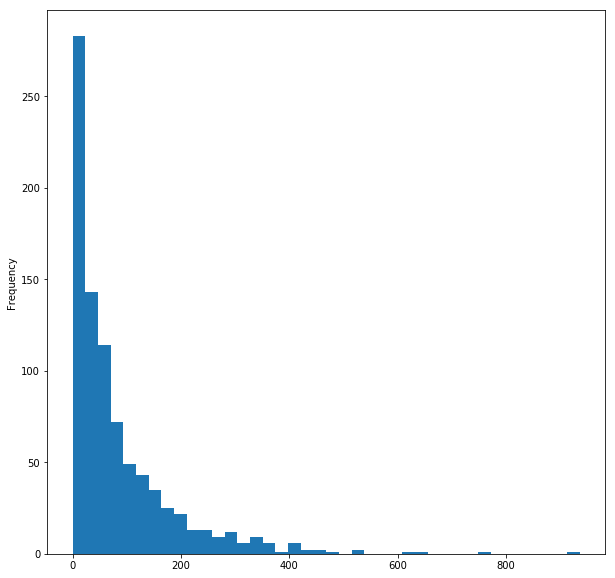

In [8]:
%matplotlib inline
imdb_movies['Revenue (Millions)'].plot.hist(bins=40, figsize=(10,10))

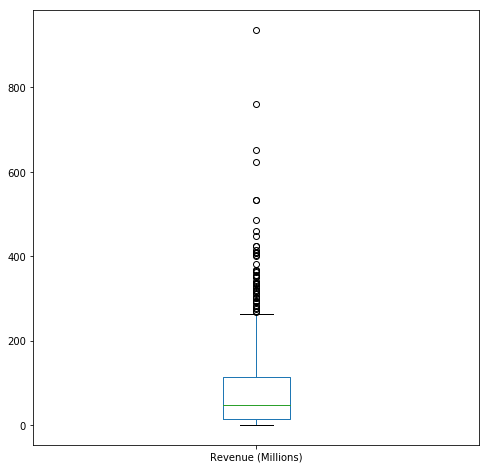

In [9]:
imdb_movies['Revenue (Millions)'].plot.box(figsize=(8,8))

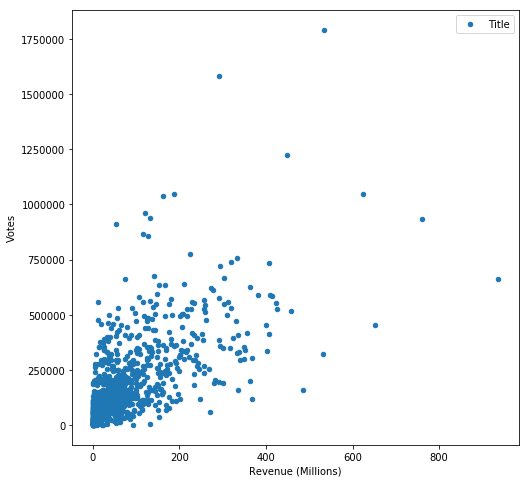

In [11]:
imdb_movies.plot.scatter(x='Revenue (Millions)', y='Votes', figsize=(8, 8))

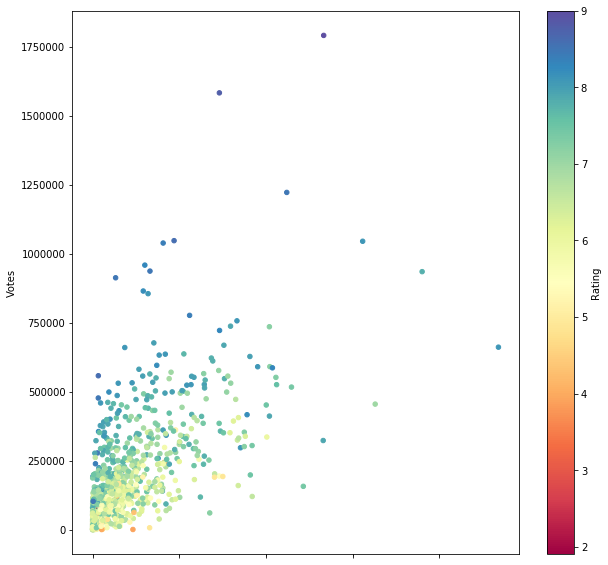

In [15]:
imdb_movies.plot.scatter(x='Revenue (Millions)', y='Votes', c='Rating', colormap='Spectral', figsize=(10, 10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x121c8d278>,
      dtype=object)

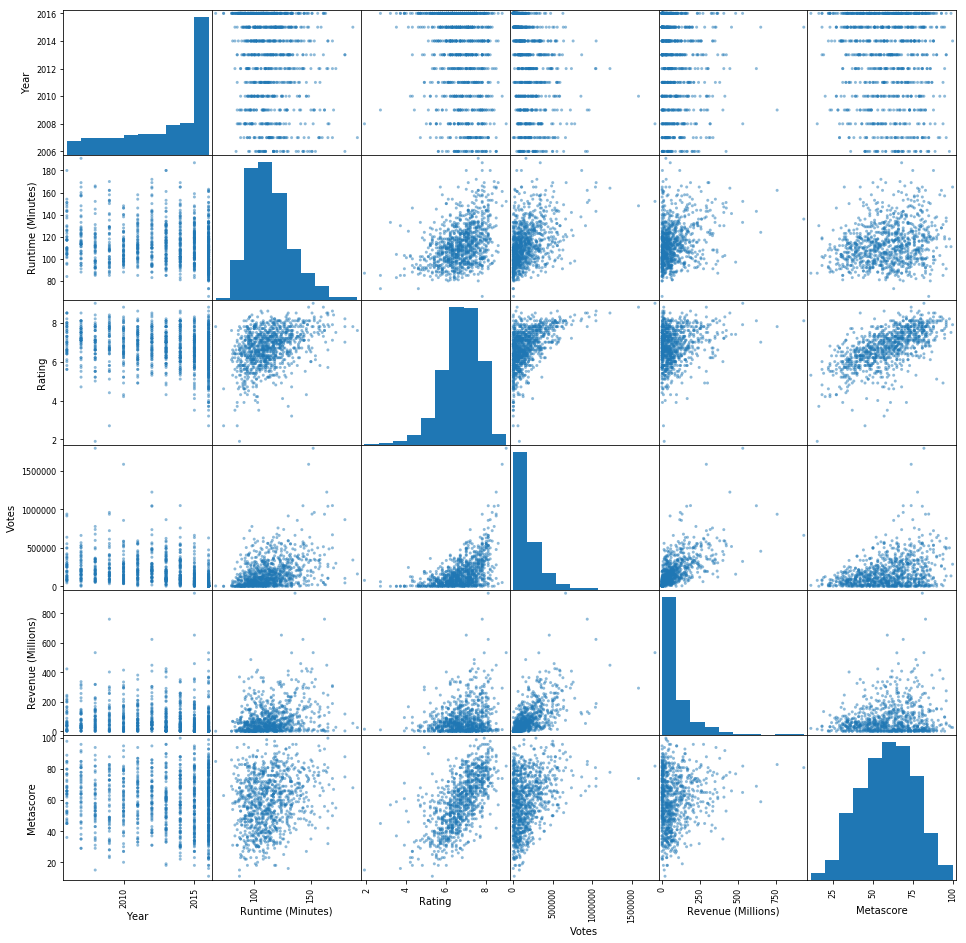

In [16]:
from pandas.plotting import scatter_matrix
scatter_matrix(imdb_movies, figsize=(16, 16))